In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import os
import pandas as pd
import math
# ROOT.enableJSVis()
c1 = ROOT.TCanvas()
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")

Welcome to JupyROOT 6.22/02


0

In [2]:
bigdata = pd.DataFrame()
folder = "/home/vasu/PPC/PPC_SigGen/arrays/60kevflip-right"
for file in os.listdir(folder):
    filepath = os.path.join(folder,file)
    df = pd.read_csv(filepath,header=None,sep='\t')
    bigdata = bigdata.append(df,ignore_index=True)

In [3]:
# grouped2 = bigdata.groupby([0,1])[2].std()
# # print grouped2

In [4]:
# grouped3 = bigdata.groupby([0,1])[3].std()
# # print grouped3

In [5]:
findata = pd.DataFrame()
grouped = bigdata.groupby([0,1])
sets = list(grouped.groups.keys())
# sets = list(grouped.keys())
for i in range (len(grouped)):
    findata = findata.append(grouped.get_group(sets[i]),ignore_index=True)

In [6]:
print (len(grouped))

1723


In [7]:
count = 0
Rrms = []
Zrms = []
for i in range (len(grouped)):
    cnum = 0
    rsum = 0
    zsum = 0
    rmean = sets[i][0]
    zmean = sets[i][1]
    while ((findata[0][count]==rmean) and (findata[1][count]==zmean)):
        rsum = rsum + (findata[2][count]-rmean)**2
        zsum = zsum + (findata[3][count]-zmean)**2
        count = count+1
        cnum = cnum+1
        if (count == len(findata)):
            break
        else:
            continue
    Rrms.append(math.sqrt(abs((rsum)/cnum-1)))
    Zrms.append(math.sqrt(abs((zsum)/cnum-1)))

In [8]:
R_true = []
Z_true = []
for i in range (len(grouped)):
    R_true.append(sets[i][0])
    Z_true.append(sets[i][1])
    

In [9]:
hrRMS = ROOT.TH2F("hrRMS","hrRMS",33,0,33,51,0,51)
hzRMS = ROOT.TH2F("hzRMS","hzRMS",33,0,33,51,0,51)
h1XR = hrRMS.GetXaxis().GetBinWidth(1)
h2YR = hrRMS.GetYaxis().GetBinWidth(1)
h1XZ = hzRMS.GetXaxis().GetBinWidth(1)
h2YZ = hzRMS.GetYaxis().GetBinWidth(1)

for i in range (len(R_true)):
    hrRMS.SetBinContent(int(R_true[i]/h1XR),int(Z_true[i]/h2YR),Rrms[i])
    hzRMS.SetBinContent(int(R_true[i]/h1XZ),int(Z_true[i]/h2YZ),Zrms[i])

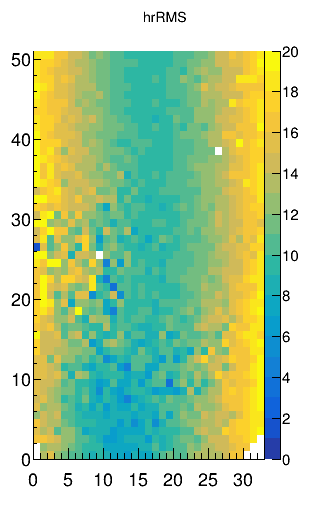

In [10]:
hrRMS.Draw("colz")
c1.SetWindowSize(500,510);
c1.SetCanvasSize(330,510);
hrRMS.SetMaximum(20)
hrRMS.SetMinimum(0)
hrRMS.GetXaxis().SetLabelSize(0.06)
hrRMS.GetYaxis().SetLabelSize(0.06)
hrRMS.GetXaxis().SetTitleSize(444)
hrRMS.GetYaxis().SetTitleSize(444)
hrRMS.GetZaxis().SetLabelSize(0.05)
hrRMS.SetStats(0)
c1.SetRightMargin(0.2)
c1.Draw()

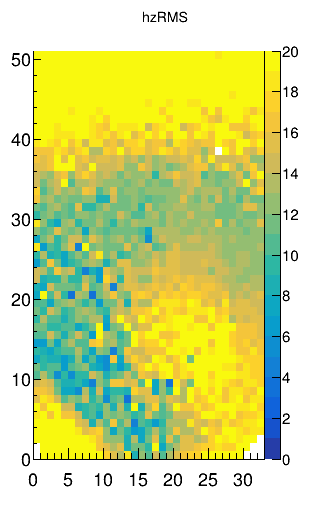

In [11]:
hzRMS.Draw("colz")
c1.SetWindowSize(500,510);
c1.SetCanvasSize(330,510);
hzRMS.SetMaximum(20)
hzRMS.SetMinimum(0)
hzRMS.GetXaxis().SetLabelSize(0.06)
hzRMS.GetYaxis().SetLabelSize(0.06)
hzRMS.GetXaxis().SetTitleSize(444)
hzRMS.GetYaxis().SetTitleSize(444)
hzRMS.GetZaxis().SetLabelSize(0.05)
hzRMS.SetStats(0)
c1.SetRightMargin(0.2)
c1.Draw()